# Udacity NanaDegree
# Project 1 - Explore Weather Trends
## Author: Ben Farrell
## Date: 30/03/2020

### Objectives

1. Extract data from SQL Database in csv file format.
2. Open csv file.
3. Create line chart to present temperature trends of a city (London) and the world average over the sample period.
4. Make observations about the data and trends between London and Global temperatures.

### Executive Summary

1. Between __1750 - 1900__ the weather data for London and the world oscillates, but the mean remains relatively constant. The global average was approximately __8.07 Deg C__, whereas the London average was approximately __9.25 Deg C__.
2. Between __1900 - 2013__ the weather data for London and the world appears to rise consistantly over the long term (50> years), despite some short term downwards trends. The global average was approximately __8.75 Deg C__, whereas the London average was approximately __9.74 Deg C__.
3. From __1975__ onwards, the annual average temperature of both London and the world has increased at the fastest rate over the observation period.
4. Over the observation period, the average temperature of the world and London has increased by approximately __1.5 Deg C__
5. From the linear best fit curves, it appears the world is warming up faster than London because the gradient for the world is steeper.
6. It is evident that from __1975__ onwards, the global temperature has rise far more often than it has fallen. This is depicted by the bar chart titled __"Global Annual Fluctuations in Temp"__ showing many more <font color=red> red bars (+ve changes in temperature) </font>, rather than <font color=blue> blue bars (-ve changes in temperature)</font>

### Part 1 - Data Extraction

__SQL Query to extract weather data for London and the world__

In [ ]:
SELECT cd.year,
cd.avg_temp London_Avg,
gd.avg_temp Global_Avg
FROM city_data cd
JOIN global_data gd
ON gd.year = cd.year
WHERE cd.city = 'London' AND cd.country = 'United Kingdom'

### Part 2 - Access CSV via Pandas in Jupyter Notebook

Import required libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab 
import numpy.polynomial.polynomial as poly
%matplotlib inline

Set up some formatting for plots

In [99]:
plt.rcParams['figure.figsize'] = (12,6)
axisfont = 14
labelfont = 15

Read in CSV file for London and World which were downloaded from SQL queries

First of all I will review the data to ensure that it has been imported correctly, checking the shape and for any NaN values.

In [100]:
df = pd.read_csv('Results.csv')
df.head(2)

,year,london_avg,global_avg
0,1750,10.25,8.72
1,1751,9.99,7.98


In [101]:
df.isna().any()

year          False
london_avg    False
global_avg    False
dtype: bool

In [102]:
df.shape

(264, 3)

I'll take a quick look at the data to get a feel for whether it is what I'm expecting.

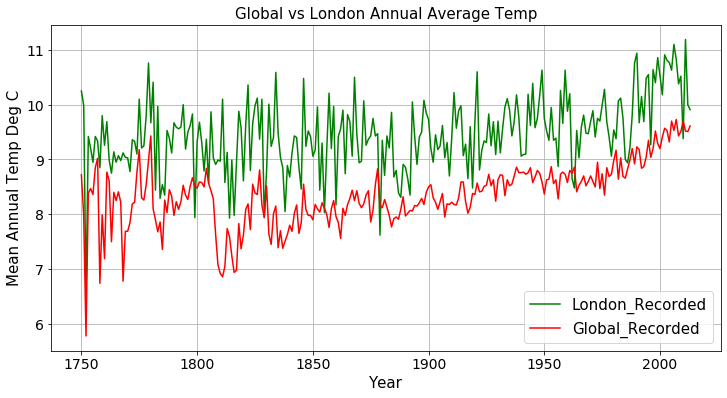

In [103]:
plt.plot(df.year,df.london_avg, 'g-',label="London_Recorded")
plt.plot(df.year,df.global_avg, 'r-',label='Global_Recorded')
plt.xlabel('Year',fontsize=labelfont)
plt.ylabel('Mean Annual Temp Deg C',fontsize=labelfont)
plt.title('Global vs London Annual Average Temp',fontsize=labelfont)
plt.grid(b=True,which='major',axis='both')
plt.xticks(fontsize=axisfont)
plt.yticks(fontsize=axisfont)
plt.legend(loc='best',fontsize=labelfont)

I am now satisfied that i have collected the two key data sets required to complete the project.

They are in pandas dataframes and I can now begin exploring the data.

### Part 3 - Create Line Chart

#### 3.1 Create Seven (7) Year Rolling Averages for London and Global Weather Data

A moving average over a 7 year period smoothes out the chart to better identify the trends.

In [104]:
df['LRA'] = df['london_avg'].rolling(7,min_periods = 1).mean()
df['GRA'] = df['global_avg'].rolling(7,min_periods = 1).mean()
df.head(2)

,year,london_avg,global_avg,LRA,GRA
0,1750,10.25,8.72,10.25,8.72
1,1751,9.99,7.98,10.12,8.35


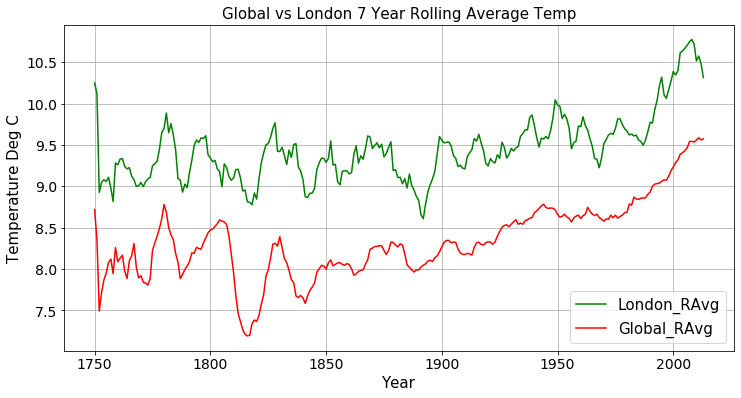

In [105]:
plt.plot(df.year,df.LRA, 'g-',label="London_RAvg")
plt.plot(df.year,df.GRA, 'r-',label='Global_RAvg')
plt.xlabel('Year',fontsize=labelfont)
plt.ylabel('Temperature Deg C',fontsize=labelfont)
plt.title('Global vs London 7 Year Rolling Average Temp',fontsize=labelfont)
plt.grid(b=True,which='major',axis='both')
plt.xticks(fontsize=axisfont)
plt.yticks(fontsize=axisfont)
plt.legend(loc='best',fontsize=labelfont)

#### 3.3 Trend Lines

The data for both London and the world show a trend of increasing temperatures from about the 1850s. I will apply a linear best fit  to the whole dataset to visualise this.

In [106]:
coefs = poly.polyfit(df['year'],df['LRA'],1)
London_fit = poly.polyval(df['year'],coefs)

coefs2 = poly.polyfit(df['year'],df['GRA'],1)
global_fit = poly.polyval(df['year'],coefs2)

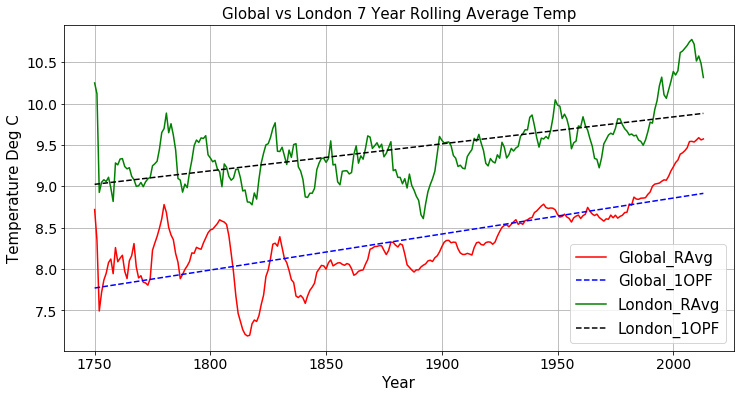

In [107]:
plt.plot(df.year,df.GRA, 'r-',label='Global_RAvg')
plt.plot(df.year,global_fit, 'b--',label='Global_1OPF')
plt.plot(df.year,df.LRA, 'g-',label="London_RAvg")
plt.plot(df.year,London_fit, 'k--',label='London_1OPF')
plt.xlabel('Year',fontsize=labelfont)
plt.ylabel('Temperature Deg C',fontsize=labelfont)
plt.title('Global vs London 7 Year Rolling Average Temp',fontsize=labelfont)
plt.grid(b=True,which='major',axis='both')
#plt.ylim(5,10)
plt.xticks(fontsize=axisfont)
plt.yticks(fontsize=axisfont)
plt.legend(loc='best',fontsize=labelfont)

### Part 4: Make Observations

#### 4.2 Observations on Weather Data

1. Between __1750 - 1900__ the weather data for London and the world oscillates, but the mean remains relatively constant. The global average was approximately __8.07 Deg C__, whereas the London average was approximately __9.25 Deg C__.

In [108]:
Lon_1750_1900=df[['london_avg']].iloc[:151].mean()
Glob_1750_1900=df[['global_avg']].iloc[:151].mean()
print('Mean Temperature of London between 1750-1850 was: {} Deg C'.format(round(Lon_1750_1900,2)))
print('Mean Temperature of World between 1750-1850 was: {} Deg C'.format(round(Glob_1750_1900,2)))

Mean Temperature of London between 1750-1850 was: london_avg    9.25
dtype: float64 Deg C
Mean Temperature of World between 1750-1850 was: global_avg    8.07
dtype: float64 Deg C


2. Between __1900 - 2013__ the weather data for London and the world appears to rise consistantly over the long term (50> years), despite some short term downwards trends. The global average was approximately __8.75 Deg C__, whereas the London average was approximately __9.74 Deg C__.

In [109]:
Lon_1900_2013=df[['london_avg']].iloc[150:].mean()
Glob_1900_2013=df[['global_avg']].iloc[150:].mean()
print('Mean Temperature of London between 1900_2013 was: {} Deg C'.format(round(Lon_1900_2013,2)))
print('Mean Temperature of World between 1900_2013 was: {} Deg C'.format(round(Glob_1900_2013,2)))

Mean Temperature of London between 1900_2013 was: london_avg    9.74
dtype: float64 Deg C
Mean Temperature of World between 1900_2013 was: global_avg    8.75
dtype: float64 Deg C


3. From __1975__ onwards, the annual average temperature of both London and the world has increased at the fastest rate over the observation period.
4. Over the observation period, the average temperature of the world and London has increased by approximately __1.5 Deg C__
5. From the linear best fit curves, it appears the world is warming up faster than London because the gradient for the world is steeper.

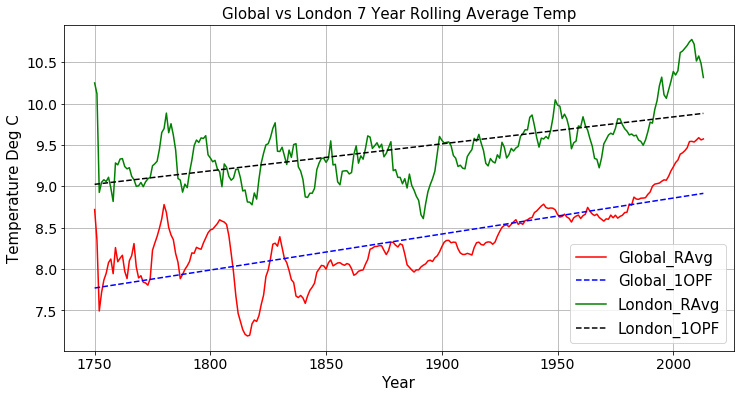

In [110]:
plt.plot(df.year,df.GRA, 'r-',label='Global_RAvg')
plt.plot(df.year,global_fit, 'b--',label='Global_1OPF')
plt.plot(df.year,df.LRA, 'g-',label="London_RAvg")
plt.plot(df.year,London_fit, 'k--',label='London_1OPF')
plt.xlabel('Year',fontsize=labelfont)
plt.ylabel('Temperature Deg C',fontsize=labelfont)
plt.title('Global vs London 7 Year Rolling Average Temp',fontsize=labelfont)
plt.grid(b=True,which='major',axis='both')
#plt.ylim(5,10)
plt.xticks(fontsize=axisfont)
plt.yticks(fontsize=axisfont)
plt.legend(loc='best',fontsize=labelfont)

6. The below bar charts show the year-on-year temperature changes for London and the world. These have been calculated from the seven year moving average. It is evident that from __1975__ onwards, the global temperature has rise far more often than it has fallen. This is depicted by the chart showing many more <font color=red> red bars (+ve changes in temperature) </font>, rather than <font color=blue> blue bars (-ve changes in temperature)</font>

In [111]:
df2 = df[['LRA','GRA']].diff()
df2.rename(columns={'LRA':'Ldiff','GRA':'Gdiff'},inplace=True)

In [112]:
df3 = df.merge(df2,left_index=True,right_index=True)

In [113]:
df3['Ldiff_Pos'] = df3['Ldiff'] > 0
df3['Gdiff_Pos'] = df3['Gdiff'] > 0

(array([-1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,
         0.75]),
 <a list of 10 Text yticklabel objects>)

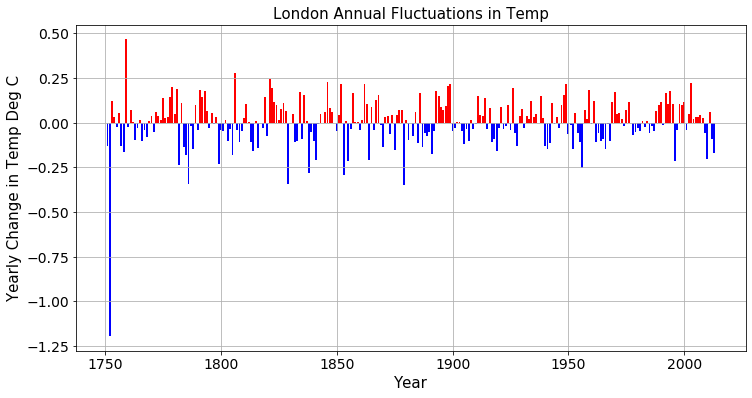

In [114]:
plt.bar(df3.year,df3.Ldiff,color=df3.Ldiff_Pos.map({True:'r',False:'b'}))
plt.xlabel('Year',fontsize=labelfont)
plt.ylabel('Yearly Change in Temp Deg C',fontsize=labelfont)
plt.title('London Annual Fluctuations in Temp',fontsize=labelfont)
plt.grid(b=True,which='major',axis='both')
plt.xticks(fontsize=axisfont)
plt.yticks(fontsize=axisfont)

(array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 <a list of 9 Text yticklabel objects>)

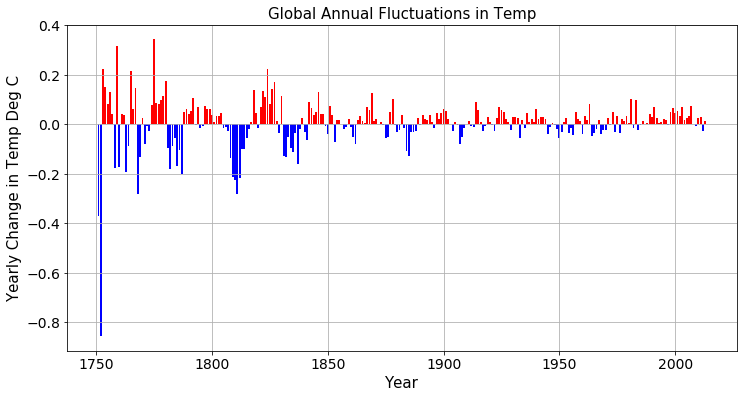

In [115]:
plt.bar(df3.year,df3.Gdiff,color=df3.Gdiff_Pos.map({True:'r',False:'b'}))
plt.xlabel('Year',fontsize=labelfont)
plt.ylabel('Yearly Change in Temp Deg C',fontsize=labelfont)
plt.title('Global Annual Fluctuations in Temp',fontsize=labelfont)
plt.grid(b=True,which='major',axis='both')
plt.xticks(fontsize=axisfont)
plt.yticks(fontsize=axisfont)